In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("skill_builder_data.csv")
data.head()

,order_id,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response_time,tutor_mode,answer_type,sequence_id,student_class_id,position,problem_set_type,base_sequence_id,list_skill_ids,list_skills,teacher_id,school_id
0,20224085,232368,73963,42904,76429,0,0.0,3,106016.0,tutor,choose_1,6272.0,11816.0,93.0,MasterySection,6272.0,NaN,NaN,22763.0,73.0
1,20224095,232368,73963,42904,76430,0,1.0,1,194187.0,tutor,choose_1,6272.0,11816.0,93.0,MasterySection,6272.0,NaN,NaN,22763.0,73.0
2,20224113,232368,73963,42904,76431,0,1.0,1,12734.0,tutor,algebra,6272.0,11816.0,93.0,MasterySection,6272.0,NaN,NaN,22763.0,73.0
3,20224123,232368,73963,42904,76432,0,1.0,1,333484.0,tutor,choose_1,6272.0,11816.0,93.0,MasterySection,6272.0,NaN,NaN,22763.0,73.0
4,20224142,232368,73963,42904,76433,0,0.0,2,52828.0,tutor,algebra,6272.0,11816.0,93.0,MasterySection,6272.0,NaN,NaN,22763.0,73.0


In [3]:
data.isnull().sum()

order_id                       0
assignment_id                  0
user_id                        0
assistment_id                  0
problem_id                     0
original                       0
correct                        0
attempt_count                  0
ms_first_response_time       125
tutor_mode                     0
answer_type                    0
sequence_id                11006
student_class_id           11006
position                   11006
problem_set_type           11006
base_sequence_id           11006
list_skill_ids            577989
list_skills               577989
teacher_id                 11006
school_id                  28919
dtype: int64

In [11]:
df = data[["user_id", "correct", "list_skill_ids","list_skills"]].copy()

In [12]:
df.head()

,user_id,correct,list_skill_ids,list_skills
0,73963,0.0,NaN,NaN
1,73963,1.0,NaN,NaN
2,73963,1.0,NaN,NaN
3,73963,1.0,NaN,NaN
4,73963,0.0,NaN,NaN


In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(433090, 4)

In [15]:
df.head()

,user_id,correct,list_skill_ids,list_skills
17,78068,0.0,10;12,Mean;Table
21,63205,1.0,279,Multiplication and Division Integers
31,70759,0.0,17,Probability Compound
32,70759,0.0,17,Probability Compound
33,70759,1.0,17,Probability Compound


In [16]:
df["list_skill_ids"] = df["list_skill_ids"].astype(str).str.split(";")
df["list_skills"] = df["list_skills"].astype(str).str.split(";")


In [17]:
df = df[df["list_skill_ids"].str.len() == df["list_skills"].str.len()]

In [18]:
df = df.explode(["list_skill_ids", "list_skills"])

In [19]:
df["skill_id"] = df["list_skill_ids"].astype(int)
df["skill_name"] = df["list_skills"].str.strip()

In [20]:
df.drop(columns=["list_skill_ids", "list_skills"], inplace=True)

In [21]:
df.head()

,user_id,correct,skill_id,skill_name
17,78068,0.0,10,Mean
17,78068,0.0,12,Table
21,63205,1.0,279,Multiplication and Division Integers
31,70759,0.0,17,Probability Compound
32,70759,0.0,17,Probability Compound


In [22]:
performance = df.groupby(['user_id', 'skill_name']).agg(
    avg_score=('correct', 'mean'),
    attempts=('correct', 'count')
).reset_index()

In [23]:
performance.to_csv("cleaned_skill_builder_data.csv", index=False)

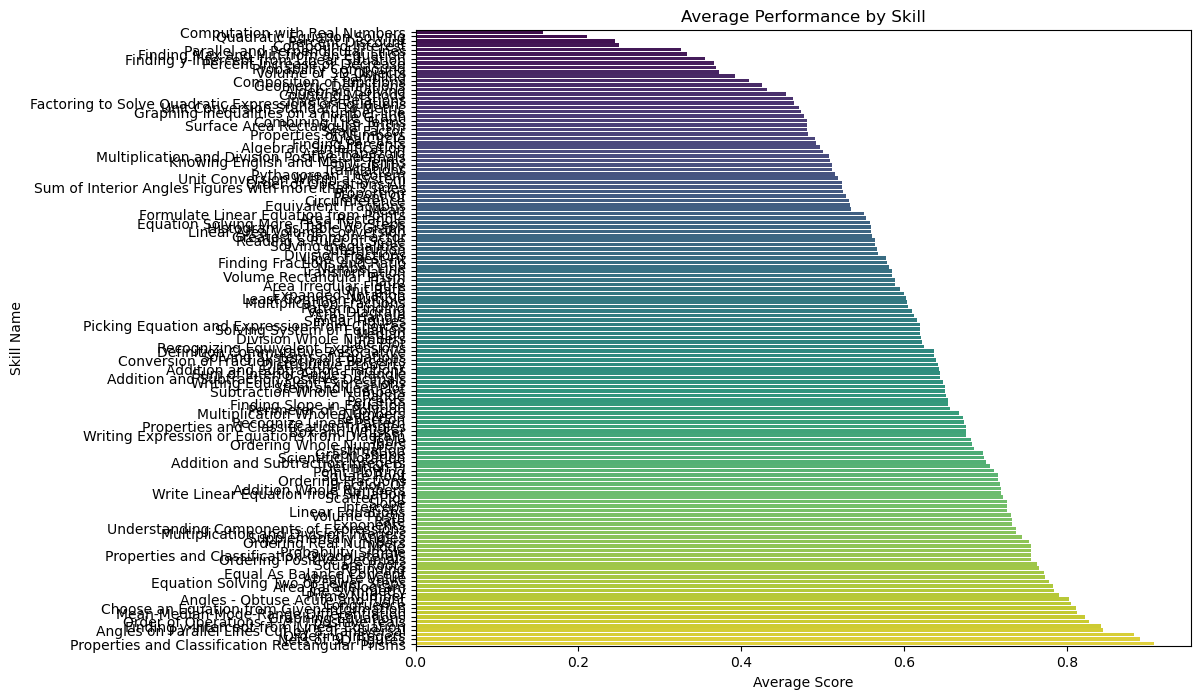

In [25]:
skill_avg = performance.groupby("skill_name")["avg_score"].mean().sort_values()
plt.figure(figsize=(10, 8))
sb.barplot(x=skill_avg.values, y=skill_avg.index, palette="viridis")
plt.title("Average Performance by Skill")
plt.xlabel("Average Score")
plt.ylabel("Skill Name")
plt.show()

In [26]:
performance.head()

,user_id,skill_name,avg_score,attempts
0,21432,Similar Figures,1.000000,1
1,21825,Circle Graph,0.666667,3
2,21825,Equivalent Fractions,1.000000,2
3,21825,Mean,0.800000,5
4,21825,Median,0.333333,3


In [30]:
performance["skill_name"].unique()

array(['Similar Figures', 'Circle Graph', 'Equivalent Fractions', 'Mean',
       'Median', 'Multiplication and Division Integers', 'Percent Of',
       'Stem and Leaf Plot', 'Table',
       'Addition and Subtraction Fractions',
       'Addition and Subtraction Integers',
       'Addition and Subtraction Positive Decimals', 'Circumference',
       'Congruence', 'Conversion of Fraction Decimals Percents',
       'Division Fractions', 'Estimation', 'Finding Percents',
       'Multiplication Fractions', 'Multiplication Whole Numbers',
       'Multiplication and Division Positive Decimals',
       'Nets of 3D Figures', 'Ordering Fractions',
       'Ordering Positive Decimals', 'Percent Increase or Decrease',
       'Perimeter of a Polygon',
       'Sum of Interior Angles Figures with more than 3 sides',
       'Sum of Interior Angles Triangle', 'Supplementary Angles',
       'Number Line', 'Exponents', 'Box and Whisker',
       'Histogram as Table or Graph', 'Range', 'Absolute Value',
     

In [28]:
performance["skill_name"].unique().sum()

'Similar FiguresCircle GraphEquivalent FractionsMeanMedianMultiplication and Division IntegersPercent OfStem and Leaf PlotTableAddition and Subtraction FractionsAddition and Subtraction IntegersAddition and Subtraction Positive DecimalsCircumferenceCongruenceConversion of Fraction Decimals PercentsDivision FractionsEstimationFinding PercentsMultiplication FractionsMultiplication Whole NumbersMultiplication and Division Positive DecimalsNets of 3D FiguresOrdering FractionsOrdering Positive DecimalsPercent Increase or DecreasePerimeter of a PolygonSum of Interior Angles Figures with more than 3 sidesSum of Interior Angles TriangleSupplementary AnglesNumber LineExponentsBox and WhiskerHistogram as Table or GraphRangeAbsolute ValueAddition Whole NumbersArea CircleDivisibilityFinding Fractions and RatioFraction OfLeast Common MultipleModeOrdering IntegersOrdering Real NumbersPattern FindingPrime NumberProbability SimpleProportionPythagorean TheoremRoundingScatter PlotScientific NotationSqua